In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

from glob import glob
import pandas as pd
from astropy.stats import sigma_clip

In [2]:
obs = pd.read_csv('obs_list.csv')

In [61]:
obs

,field,name,chip,exptime,jd,date,ra,dec,moon_sep,sky,filename
0,yse257Ba,A7247-yse257Ba-R-0,0.0,120.0,2.459648e+06,2022-03-09,05:27:05.0,-24:11:25.0,49.463289,3213.0,/home/phys/astro8/MJArchive/MOA/ALERT/A7247-ys...
1,2021_CH,A4319-2021_CH-R-9,9.0,300.0,2.459264e+06,2021-02-18,16:04:46.2,-52:46:19.6,140.067292,6226.0,/home/phys/astro8/MJArchive/MOA/ALERT/A4319-20...
2,C2021_A7,A3965-C2021_A7-R-8,8.0,60.0,2.459259e+06,2021-02-13,05:57:07.4,-58:09:36.0,87.069764,17374.0,/home/phys/astro8/MJArchive/MOA/ALERT/A3965-C2...
3,yse257Da,A7285-yse257Da-V-0,0.0,120.0,2.459658e+06,2022-03-19,06:02:06.0,-22:41:27.3,100.425330,8292.0,/home/phys/astro8/MJArchive/MOA/ALERT/A7285-ys...
4,NGC4833,A7113-NGC4833-R-0,0.0,60.0,2.459618e+06,2022-02-07,13:02:57.4,-70:52:35.4,120.402095,1848.0,/home/phys/astro8/MJArchive/MOA/ALERT/A7113-NG...
...,...,...,...,...,...,...,...,...,...,...,...
12951,yse257Aa,A7223-yse257Aa-V-0,0.0,120.0,2.459643e+06,2022-03-04,05:42:05.0,-24:17:24.8,79.633728,1264.0,/home/phys/astro8/MJArchive/MOA/ALERT/A7223-ys...
12952,2021_CA1,A3830-2021_CA1-R-8,8.0,300.0,2.459257e+06,2021-02-11,08:31:38.9,-40:42:23.0,118.378115,4919.0,/home/phys/astro8/MJArchive/MOA/ALERT/A3830-20...
12953,yse257Fa,A6569-yse257Fa-R-1,1.0,300.0,2.459526e+06,2021-11-07,06:15:06.0,-21:41:28.9,131.618408,5499.0,/home/phys/astro8/MJArchive/MOA/ALERT/A6569-ys...
12954,yse401Ba,A6518-yse401Ba-V-4,4.0,300.0,2.459524e+06,2021-11-05,02:25:02.0,-01:02:57.0,158.091563,2143.0,/home/phys/astro8/MJArchive/MOA/ALERT/A6518-ys...


In [65]:
moon = obs['moon_sep'].values
sky = obs['sky'].values / obs['exptime'].values
files = obs['filename'].values

nam = obs['name'].values
f = []
for i in range(len(nam)):
    f += [nam[i].split('-')[-2]]
f = np.array(f)

ind = ~sigma_clip(sky,sigma=10).mask & (obs['chip'].values == 3) & ('R'==f)

moon = moon[ind]
sky = sky[ind]
files = files[ind]

Text(0.5, 0, 'Angle seperation from the Moon (deg)')

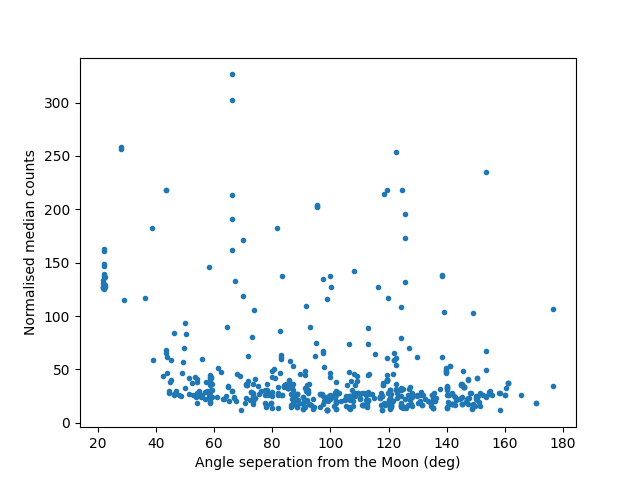

In [70]:
plt.figure()
plt.plot(moon,sky,'.')
plt.ylabel('Normalised median counts')
plt.xlabel('Angle seperation from the Moon (deg)')

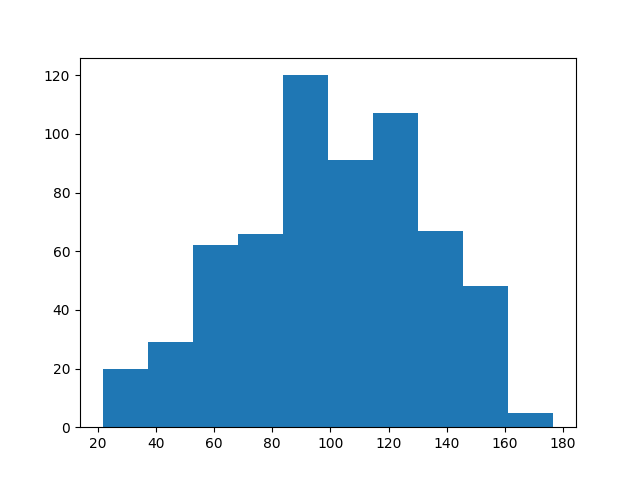

In [71]:
plt.figure()
plt.hist(moon);

In [81]:
seps = np.arange(20,95,5)

In [82]:
selected = []
for i in range(len(seps)):
    j = np.nanargmin(abs(seps[i] - moon))
    selected += [j]

In [83]:
moon[selected]

array([21.58199071, 22.38021483, 29.11673613, 36.32134651, 38.8580195 ,
       44.99641536, 49.99925382, 54.78553024, 59.39344807, 65.23379565,
       70.01563128, 75.07677378, 79.98791845, 85.00280233, 90.45433809])

In [84]:
files[selected]

array(['/home/phys/astro8/MJArchive/MOA/ALERT/A6167-ARsco-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A6107-ARsco-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A7265-yse415Ab-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A7279-yse415Ba-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A3448-starlink-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A5755-ngc2440-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A5671-C2021_C4-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A7243-yse257Ca-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A6608-2014UN271-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A6958-yse257Aa-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A4048-360502-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A6972-C2014_UN271-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALERT/A3536-NGC2068-R-3.fit.gz',
       '/home/phys/astro8/MJArchive/MOA/ALER

In [92]:
dat = pd.DataFrame(columns=['file','moon_sep'],data=np.array([files[selected],moon[selected]]).T)

In [95]:
dat.to_csv('moon_seperation_test.csv',index=False)